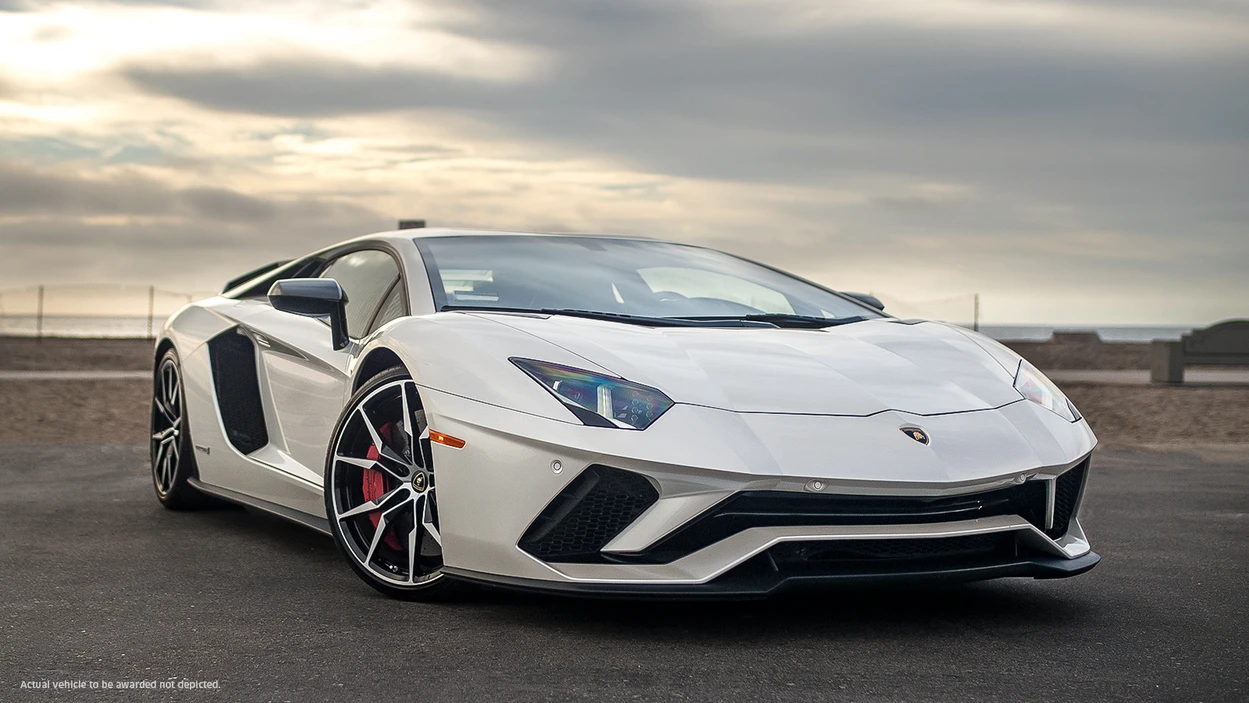

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
am=pd.read_csv('auto-mpg.csv',names=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin", "car_name"],delim_whitespace = True)
am

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [4]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [5]:
am.shape

(406, 9)

In [6]:
am.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year      float64
origin          float64
car_name         object
dtype: object

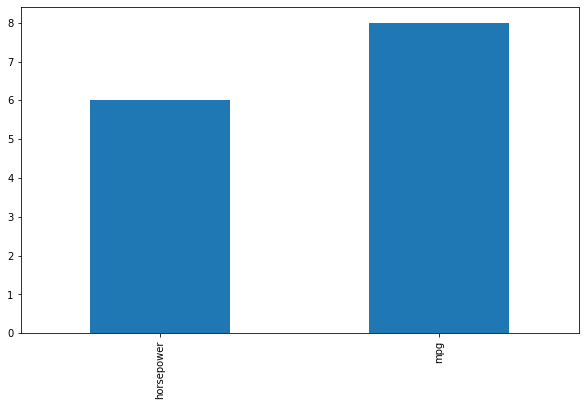

In [7]:
missing=am.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10,6))
missing.plot.bar()

There are 6 null values in horsepower column and 8 null values in mpg

In [8]:
#lets drop the null values
am=am.dropna()
am.shape

(392, 9)

14 null values removed

In [9]:
am.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


There is a large difference between mean and median in mpg horsepower,75 percentile and max has nearby differance

In [10]:
#lets see correlation
am_cor=am.corr()
am_cor

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


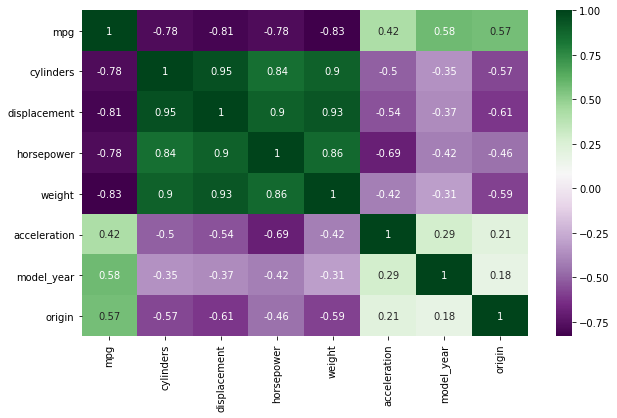

In [11]:
#lets see correlation in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(am_cor,annot=True,cmap='PRGn')
plt.show()

There correlation is higher in dark green shades where as light colors shows low correlation,purple color shows negative correlation
The higher correlation seen in cylinders and displacement,displacement and weight

In [12]:
am.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

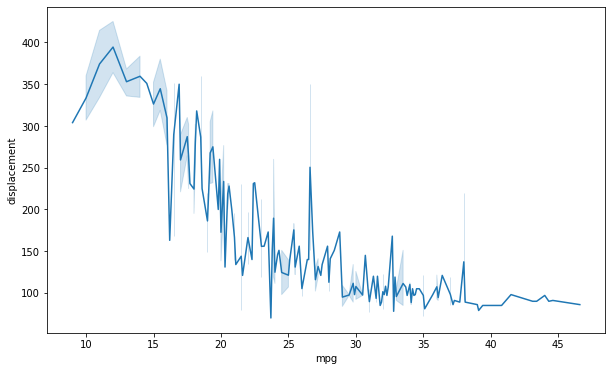

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(x='mpg',y='displacement',data=am)
plt.show()

As the mpg is lower displacement gives higher

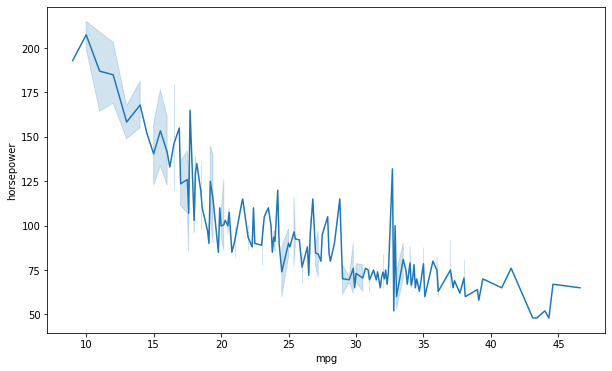

In [14]:
plt.figure(figsize=(10,6))
sns.lineplot(x='mpg',y='horsepower',data=am)
plt.show()

AS the lower mpg there will be higher horsepower

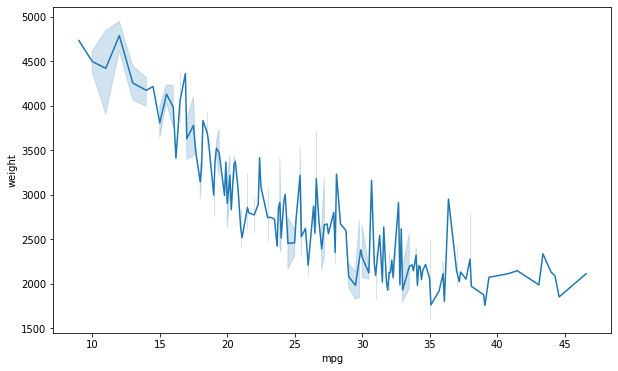

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(x='mpg',y='weight',data=am)
plt.show()

As the weight is higher mpg is lower

<Figure size 720x432 with 0 Axes>

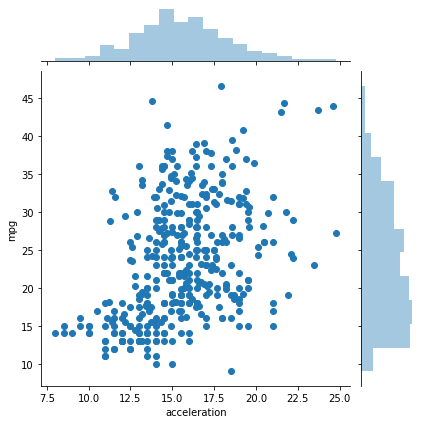

In [16]:
plt.figure(figsize=(10,6))
sns.jointplot(y='mpg',x='acceleration',data=am,kind='scatter')
plt.show()

Here the graph shows positive correlation that as acceleration increase mpg is also increase

<Figure size 720x432 with 0 Axes>

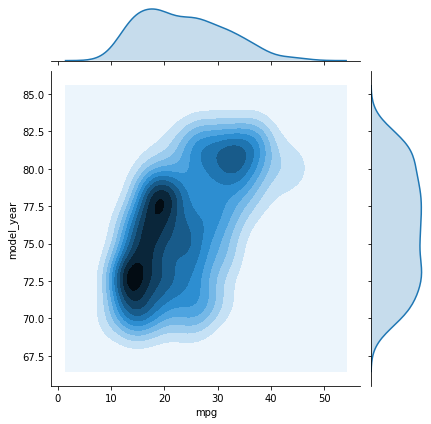

In [17]:
plt.figure(figsize=(10,6))
sns.jointplot(x='mpg',y='model_year',data=am,kind='kde')
plt.show()

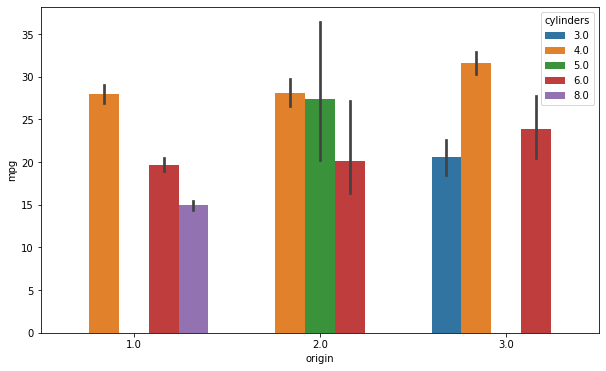

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(y='mpg',x='origin',hue='cylinders',data=am)
plt.show()

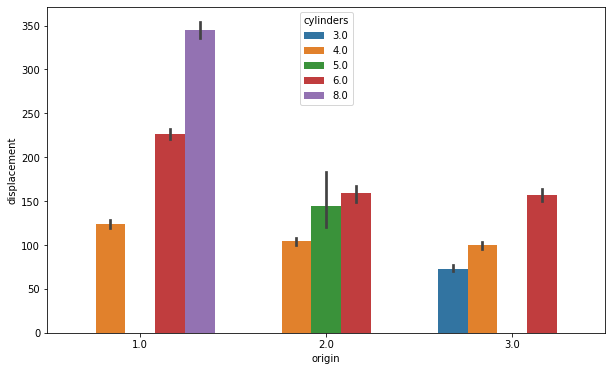

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='origin',y='displacement',hue='cylinders',data=am)
plt.show()

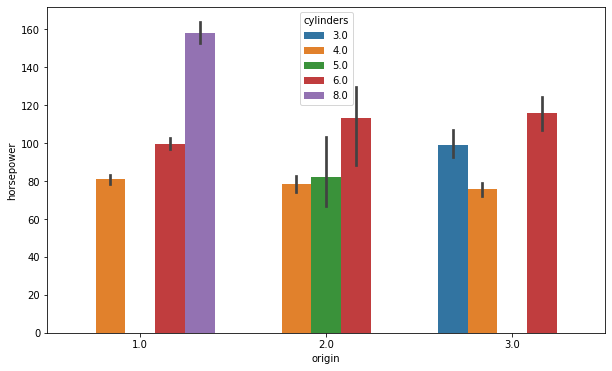

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='origin',y='horsepower',hue='cylinders',data=am)
plt.show()

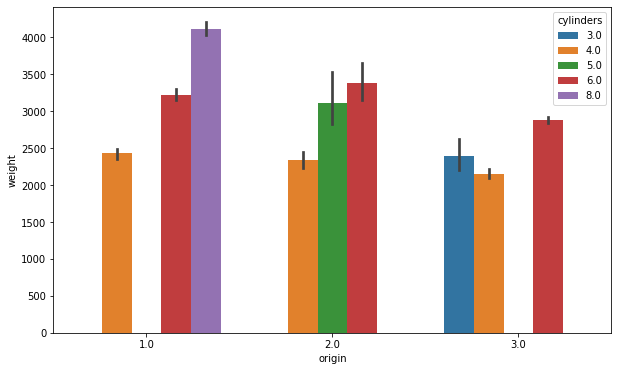

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='origin',y='weight',hue='cylinders',data=am)
plt.show()

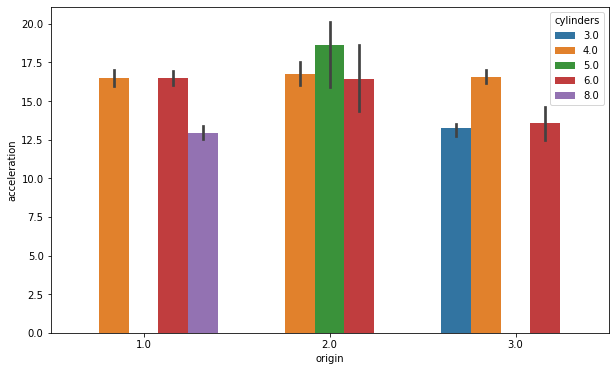

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='origin',y='acceleration',hue='cylinders',data=am)
plt.show()

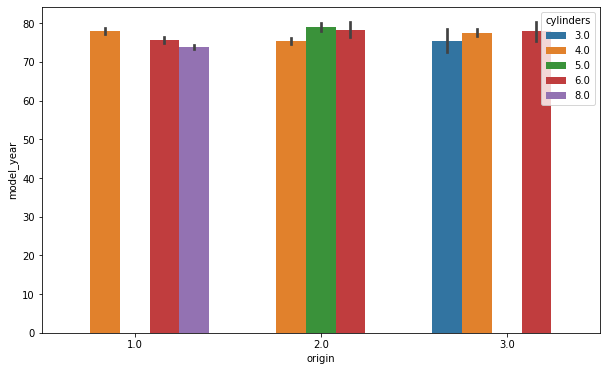

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='origin',y='model_year',hue='cylinders',data=am)
plt.show()

In [24]:
am_cylinders=am.groupby('cylinders',axis=0).sum()

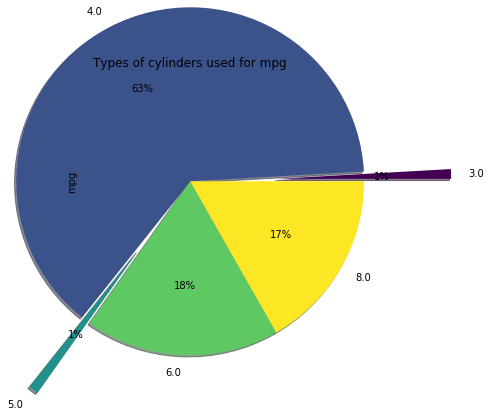

In [25]:
am_cylinders['mpg'].plot(kind='pie',radius=2,autopct='%0.0f%%',shadow=True,explode=[1,0,1,0,0],cmap='viridis')
plt.title('Types of cylinders used for mpg')
plt.show()

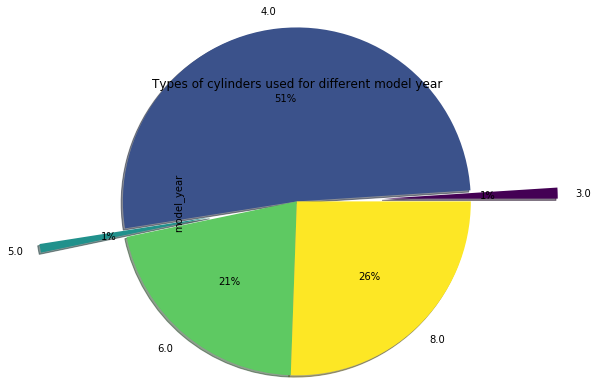

In [26]:
am_cylinders['model_year'].plot(kind='pie',radius=2,shadow=True,autopct='%0.0f%%',cmap='viridis',explode=[1,0,1,0,0])
plt.title('Types of cylinders used for different model year')
plt.show()

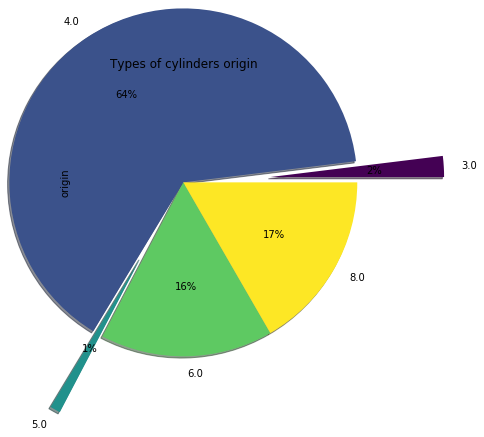

In [27]:
am_cylinders['origin'].plot(kind='pie',radius=2,autopct='%0.0f%%',shadow=True,explode=[1,0,1,0,0],cmap='viridis')
plt.title('Types of cylinders origin')
plt.show()

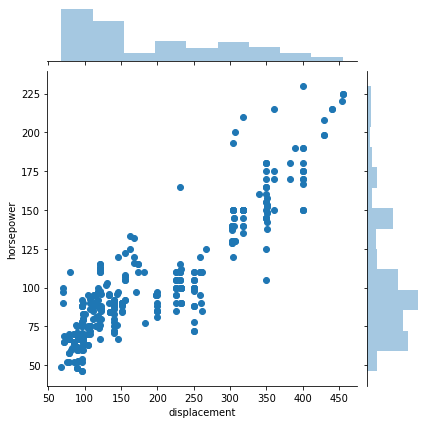

In [28]:
sns.jointplot(x='displacement',y='horsepower',data=am,kind='scatter')
plt.show()

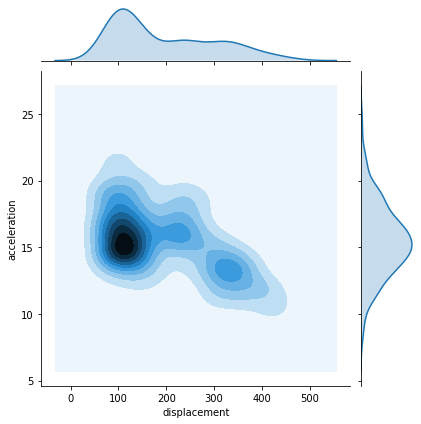

In [29]:
sns.jointplot(x='displacement',y='acceleration',data=am,kind='kde')
plt.show()

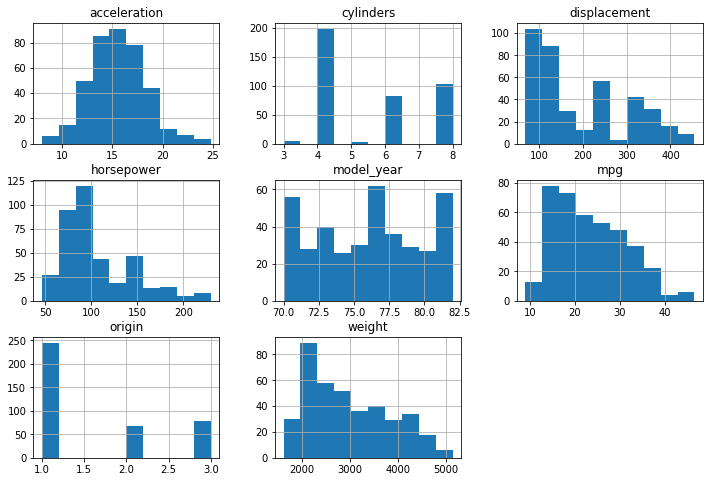

In [30]:
am.hist(figsize=(12,8))
plt.show()

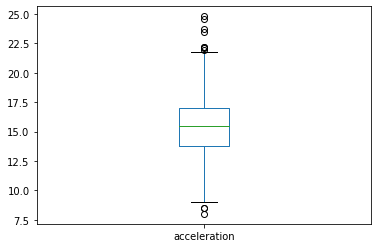

In [31]:
#check outliers
am['acceleration'].plot.box()

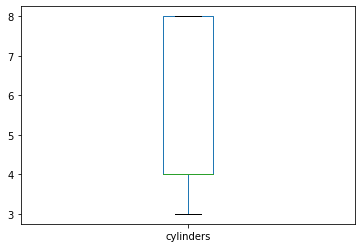

In [32]:
am['cylinders'].plot.box()

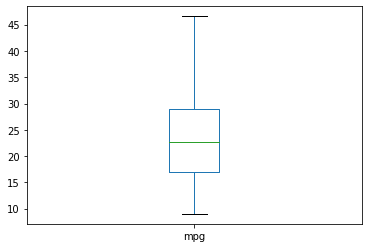

In [33]:
am['mpg'].plot.box()

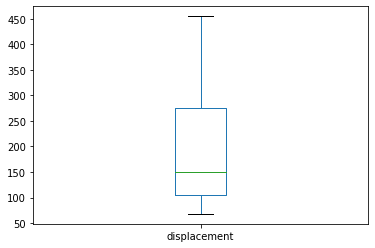

In [34]:
am['displacement'].plot.box()

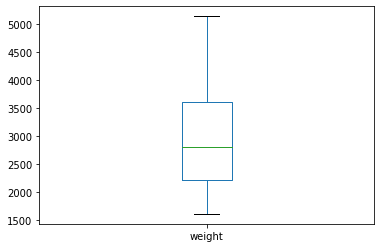

In [35]:
am['weight'].plot.box()

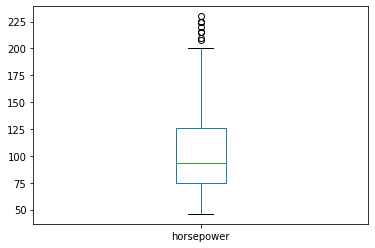

In [36]:
am['horsepower'].plot.box()

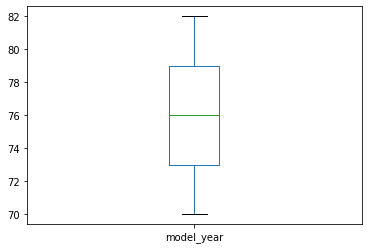

In [37]:
am['model_year'].plot.box()

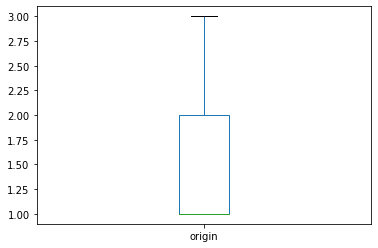

In [38]:
am['origin'].plot.box()

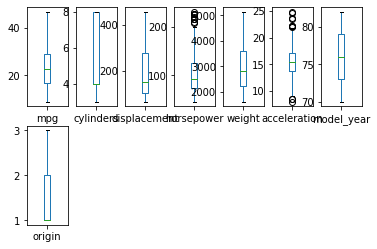

In [39]:
am.plot(kind='box',subplots=True,layout=(2,7))
plt.show()

In [40]:
#check skewness
am.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model_year      0.019688
origin          0.915185
dtype: float64

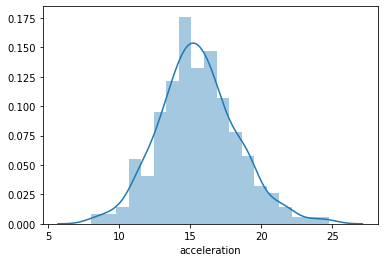

In [41]:
sns.distplot(am['acceleration'])

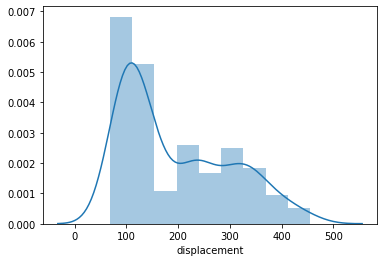

In [42]:
sns.distplot(am['displacement'])

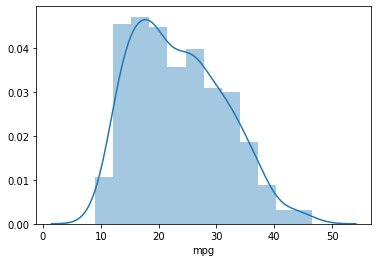

In [43]:
sns.distplot(am['mpg'])

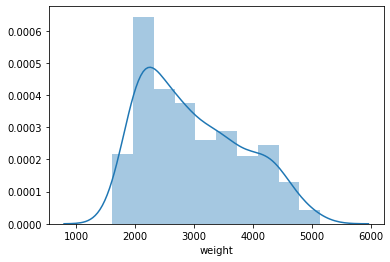

In [44]:
sns.distplot(am['weight'])

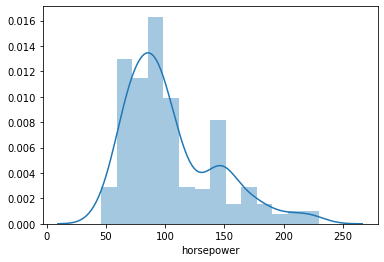

In [45]:
sns.distplot(am['horsepower'])

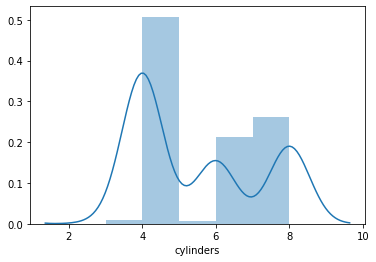

In [46]:
sns.distplot(am['cylinders'])

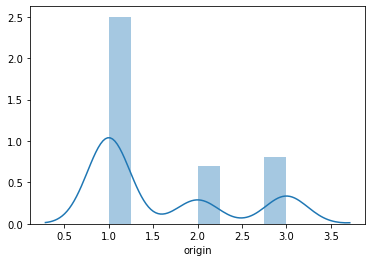

In [47]:
sns.distplot(am['origin'])

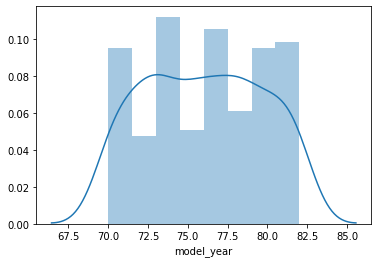

In [48]:
sns.distplot(am['model_year'])

In [49]:
am=am.drop(columns=['car_name'])

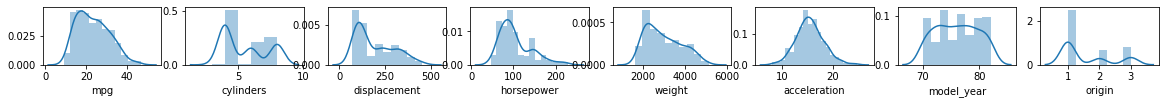

In [50]:
collist=am.columns.values
ncol=8
nrows=12
plt.figure(figsize=(20,15))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(am[collist[i]])

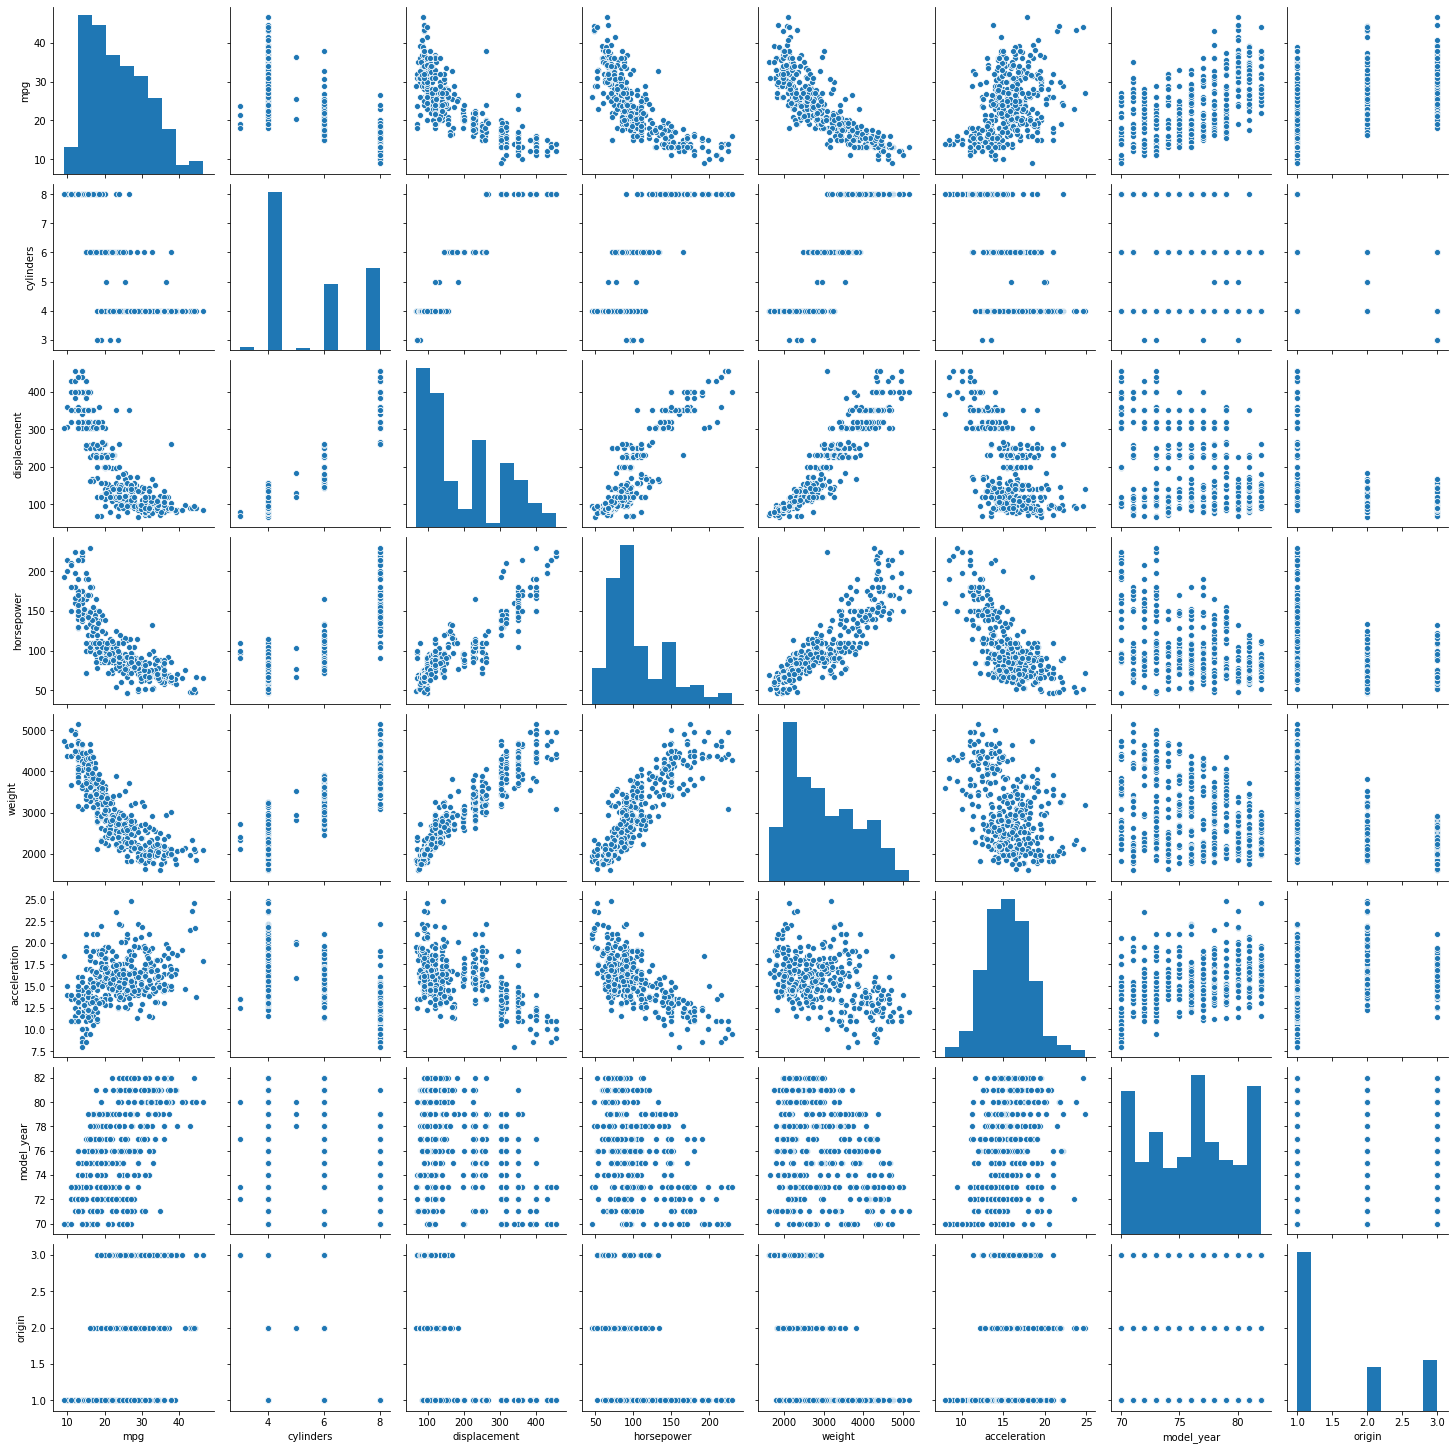

In [51]:
sns.pairplot(am)

In [52]:
am.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [53]:
#lets split the data
x=am.iloc[:,1:8]
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [54]:
y=am.iloc[:,:1]
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.285258  ,
        -1.62531533, -0.71664105],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.46672362,
        -1.62531533, -0.71664105],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.64818924,
        -1.62531533, -0.71664105],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ..., -1.4304305 ,
         1.63640964, -0.71664105],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.11008813,
         1.63640964, -0.71664105],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.40043312,
         1.63640964, -0.71664105]])

In [56]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [57]:
# random state value with which our linear model learns maximum
max_r_score=0
for r_state in range (42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 scoring corresponding to',final_r_state,'is',max_r_score)

max r2 scoring corresponding to 50 is 0.8718158989264524


In [58]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(313, 7) (79, 7)
(313, 1) (79, 1)


In [59]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2')
print(a_score)
print(a_score.mean())
print(a_score.std())

[0.6467103  0.77241016 0.59004729 0.7865709  0.80982887 0.83918792
 0.57751578 0.75474699 0.10028113 0.54874121]
0.6426040546895853
0.2065675242579492


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [61]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 2.282687662431505
R2 score: 0.8718158989264524
MAE: 1.7817270618837675
MSE: 5.210662964217009


In [62]:
from sklearn.linear_model import Lasso,Ridge

In [63]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
ls.coef_

0.8101631324449876


array([-0.92048628,  2.17057267, -0.69454596, -5.52406347,  0.29039208,
        2.8245781 ,  1.11530655])

In [64]:
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
rd.coef_

0.8103095614470376


array([[-1.12653212,  2.61460767, -0.7727948 , -5.65867507,  0.31633055,
         2.83915067,  1.15878455]])

In [65]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7513172401967314


array([-0.88691586, -0.94878197, -1.12635186, -1.68202635,  0.        ,
        1.57821313,  0.74683726])

The higher linear model regressor are ridge

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=250,random_state=50)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))

0.9142830694272865


In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(n_estimators=250,random_state=50)
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(r2_score(y_test,gb_pred))

0.8769869203048598


In [68]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor(n_estimators=250,random_state=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,ad_pred))

0.8781981907691723


In [69]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [70]:
parameters = {'kernel':('linear','rbf','poly')}
svr=svm.SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x,y)

sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [71]:
print(clf.best_params_)

{'kernel': 'rbf'}


In [72]:
sv=svm.SVR(kernel='linear')
sv.fit(x,y)
print(sv.coef_)

[[-0.67340782  0.27946856 -0.59092533 -3.80261022 -0.37317916  2.3597262
   1.42210014]]


In [73]:
print(clf.best_score_)

0.6063328333793112


In [74]:
#PREDICT THE VALUES
pred=lr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [[26.79588785]
 [17.569828  ]
 [26.06941452]
 [14.47899324]
 [28.19801131]
 [20.01089244]
 [21.85776279]
 [25.61809573]
 [19.57436043]
 [21.33510115]
 [29.673889  ]
 [26.01065409]
 [16.57496071]
 [19.81849019]
 [11.17006684]
 [17.32834325]
 [29.16092493]
 [30.03905123]
 [22.30710117]
 [35.98925039]
 [30.24115408]
 [33.89074934]
 [12.10792415]
 [13.79235375]
 [20.93078418]
 [11.50269414]
 [20.80482342]
 [22.82061605]
 [26.35739699]
 [14.07801547]
 [10.35999331]
 [29.08072089]
 [29.92752151]
 [25.27338828]
 [12.71655618]
 [24.72735709]
 [20.83097773]
 [15.36718908]
 [17.27460285]
 [14.94155813]
 [20.90608993]
 [21.28247206]
 [33.05030091]
 [20.31278019]
 [13.47571434]
 [22.7371654 ]
 [21.21692097]
 [20.17451227]
 [22.13938774]
 [34.69307469]
 [25.1403094 ]
 [34.16122762]
 [30.05295269]
 [13.78420162]
 [20.62238697]
 [24.3437162 ]
 [27.243877  ]
 [17.82598867]
 [23.29174737]
 [26.57834789]
 [10.80436451]
 [28.32251351]
 [29.33965305]
 [12.89124061]
 [25.29763727]
 [29.01

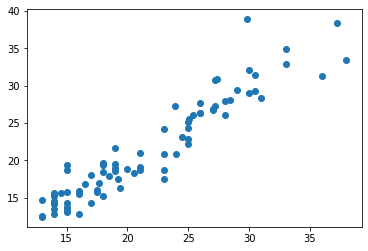

In [75]:
print(plt.scatter(x=y_test,y=gb_pred))
plt.show()

In [76]:
t=np.array([4.0,350.0,151.0,3450.0,12.0,80.0,1])
t.shape

(7,)

In [77]:
t=t.reshape(1,-1)
t.shape

(1, 7)

In [78]:
lr.predict(t)

array([[-18479.83481074]])

In [79]:
#mpg is the prdicted result

In [80]:
from joblib import dump,load
dump(am,'AUTO_MPG_PROJECT.joblib')

['AUTO_MPG_PROJECT.joblib']